In [1]:
%pip install mediapipe
import mediapipe as mp
import cv2 
import os
from collections import defaultdict
import matplotlib.pyplot as plt
from IPython.display import clear_output
os.chdir(r'E:\Đồ án\FILE ĐỒ ÁN CHỐT\dataset')
clear_output()

In [2]:
labels=os.listdir('.')
labels

['Downdog', 'Goddess', 'Plank', 'Tree', 'Warrior2']

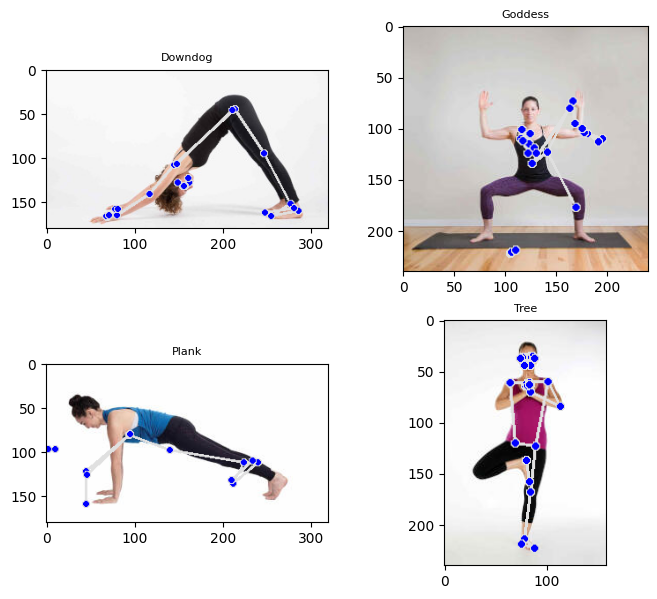

In [4]:
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
images=[]
for idx,data in enumerate(os.listdir('.')):
    for image in os.listdir(f'{data}'):
        image=cv2.imread(f'{data}/{image}')
        # or
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)
        try :
            landmarks = results.pose_landmarks

            for landmark in landmarks.landmark:
               x = landmark.x
               y = landmark.y

               # Do something with the coordinates
               mp_drawing = mp.solutions.drawing_utils
               mp_drawing.draw_landmarks(image_rgb, landmarks, mp_pose.POSE_CONNECTIONS)
               images.append(image_rgb)
               break
        except:
            continue
        break
    if idx==4:
        break
fig,axes=plt.subplots(2,2,figsize=(8,7))  

for i ,ax in enumerate(axes.flat) :
    ax.imshow(images[i])
    ax.set_title(labels[i],fontsize=8)

plt.show()

In [5]:
import pandas as pd

# Create a dictionary with data
data_set =defaultdict(list)

# Create a DataFrame from the dictionary
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
label_encode=[]
for idx,data in enumerate(os.listdir('.')):
    for image in os.listdir(f'{data}'):
        img=cv2.imread(f'{data}/{image}')

        image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        results = pose.process(image_rgb)
        landmarks = results.pose_landmarks
        try:
            for idd,landmark in enumerate(landmarks.landmark):
               x = landmark.x
               y = landmark.y
               
               data_set[f'X {idd}']=(data_set[f'X {idd}']+[x])
               data_set[f'Y {idd}']=(data_set[f'Y {idd}']+[y])
            data_set['Labels']=(data_set['Labels']+[idx]) 
            data_set['image_Name']=(data_set['image_Name']+[image])
        except:
            pass

In [6]:
data=pd.DataFrame(data_set)
data

,X 0,Y 0,X 1,Y 1,X 2,Y 2,X 3,Y 3,X 4,Y 4,...,X 29,Y 29,X 30,Y 30,X 31,Y 31,X 32,Y 32,Labels,image_Name
0,0.508115,0.713662,0.492659,0.738126,0.489574,0.737636,0.486517,0.736897,0.493334,0.738318,...,0.896728,0.890977,0.878277,0.877091,0.799371,0.925598,0.777966,0.902165,0,00000000.jpg
1,0.514479,0.629204,0.530386,0.609029,0.534995,0.611418,0.539797,0.613469,0.516317,0.594782,...,0.665588,0.807118,0.198956,0.853290,0.729461,0.846409,0.195720,0.883578,0,00000001.jpg
2,0.390248,0.428621,0.414912,0.420967,0.421661,0.424774,0.428889,0.428136,0.399637,0.402165,...,0.718067,0.904796,0.224063,0.694914,0.749449,0.972559,0.213231,0.730691,0,00000002.jpg
3,0.538670,0.670526,0.572894,0.627625,0.580595,0.630623,0.588444,0.632967,0.559012,0.665816,...,0.599658,0.823213,0.247865,0.761006,0.678297,0.916693,0.228067,0.821463,0,00000003.jpg
4,0.358550,0.759286,0.336827,0.728478,0.334542,0.731698,0.331723,0.735179,0.336685,0.751068,...,0.785580,0.804890,0.805240,0.795096,0.716788,0.889888,0.654572,0.875709,0,00000004.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
916,0.501576,0.320113,0.504506,0.314200,0.503881,0.315553,0.503122,0.317597,0.504498,0.311747,...,0.477255,0.905903,0.401216,0.925107,0.470177,0.950472,0.399675,0.991031,4,00000431.jpg
917,0.558544,0.175276,0.563992,0.156616,0.566056,0.155739,0.568078,0.155074,0.560362,0.156597,...,0.771470,0.937722,0.454568,0.939847,0.794908,0.975735,0.385402,0.962404,4,00000433.jpg
918,0.594188,0.419992,0.593879,0.409188,0.592993,0.408456,0.592092,0.407960,0.592324,0.410031,...,0.785110,0.956392,0.749829,1.005287,0.828292,0.955112,0.817708,1.030125,4,00000434.jpg
919,0.495415,0.396688,0.507677,0.372917,0.520408,0.371187,0.533116,0.369639,0.474804,0.377402,...,0.670286,1.241667,0.496471,1.280339,0.694335,1.324304,0.456892,1.356115,4,00000436.jpg


In [7]:
data.Labels.value_counts()

Labels
4    194
1    190
0    186
3    176
2    175
Name: count, dtype: int64

In [8]:
from  sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
target=data['Labels']
feutures=data.drop('Labels',axis=1)
X_train, X_test, y_train, y_test = train_test_split(feutures, target, test_size=0.2, random_state=42)

In [9]:
analysis_error=X_test['image_Name']
X_train.drop('image_Name',inplace=True,axis=1)
X_test.drop('image_Name',inplace=True,axis=1)

In [10]:
analysis_error

319    00000242.jpg
377    00000001.jpg
538    00000404.jpg
296    00000182.jpg
531    00000388.jpg
           ...     
97     00000164.jpg
907    00000412.jpg
467    00000212.jpg
732    00000007.jpg
881    00000329.jpg
Name: image_Name, Length: 185, dtype: object

In [11]:
print('X_train shape is',X_train.shape )
print('X_test shape is',X_test.shape )
print('y_train shape is',y_train.shape )
print('y_test shape is',y_test.shape )
print('analysis_error shape is',analysis_error.shape )

X_train shape is (736, 66)
X_test shape is (185, 66)
y_train shape is (736,)
y_test shape is (185,)
analysis_error shape is (185,)


In [12]:
rf_classifier = RandomForestClassifier(n_estimators=120, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=120, random_state=42)

In [13]:
from sklearn.metrics import accuracy_score
y_pred=rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8594594594594595


In [14]:
import numpy as np
np.sum(y_pred!=y_test)

26

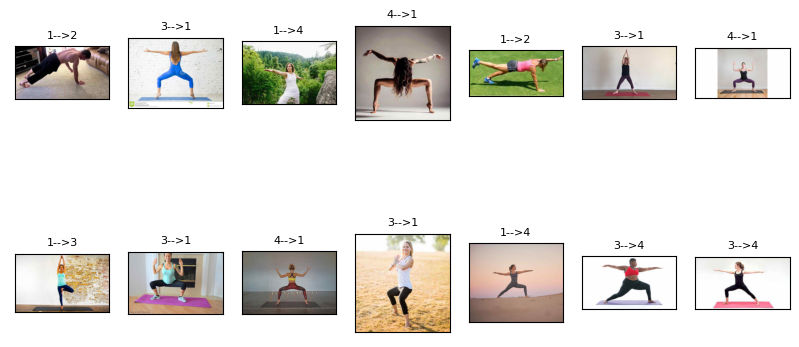

In [15]:
images=[]
false_label=y_pred[y_pred!=y_test]
y_=np.array(y_test)
true_label=y_[y_pred!=y_test]
for i in analysis_error[(y_pred!=y_test)].index:
    image_path=labels[y_test[i]]+'/'+analysis_error[i]
    image=plt.imread(image_path)
    images.append(image)

fig,axes=plt.subplots(2,7,figsize=(10,5))  

for i ,ax in enumerate(axes.flat) :
    ax.imshow(images[i])
    ax.set_title(f'{false_label[i]}-->{true_label[i]}',fontsize=8)
    ax.set_xticks([])  # Remove tick labels from x-axis
    ax.set_yticks([])  
 
plt.show()

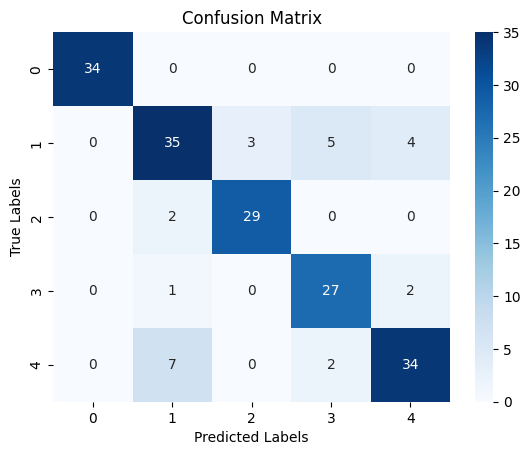

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming you have the true labels (y_true) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')

# Set the axis labels and title
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()